Understanding the dataset:

The dataset contains 124,716 entries and 17 columns related to electric vehicle population data in the United States.

VIN (1-10): Vehicle Identification Number (first 10 characters).

County: The county where the vehicle is registered.

City: The city where the vehicle is registered.

State: The state where the vehicle is registered.

Postal Code: The postal code of the registered vehicle location.

Model Year: The model year of the vehicle.

Make: The manufacturer of the vehicle.

Model: The specific model of the vehicle.

Electric Vehicle Type: The type of electric vehicle (e.g., Battery Electric Vehicle (BEV), Plug-in Hybrid Electric Vehicle (PHEV)).

Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for Clean Alternative Fuel Vehicle.

Electric Range: The electric range of the vehicle in miles.

Base MSRP: Manufacturer's Suggested Retail Price.

Legislative District: The legislative district where the vehicle is registered.

DOL Vehicle ID: Department of Licensing Vehicle ID.

Vehicle Location: Geographic coordinates of the vehicle's registered location.

Electric Utility: The electric utility company serving the vehicle's location.

2020 Census Tract: The 2020 Census Tract of the vehicle's registered location.


Missing values in County, City, Postal Code, Model, Legislative District, Vehicle Location, Electric Utility, and 2020 Census Tract columns need to be handled.

Downloading the libraries

In [139]:
!pip install pandas numpy matplotlib seaborn plotly geopandas shapely missingno

Importing the libraries

In [3]:
# Core Libraries
import pandas as pd
import numpy as np 

In [4]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


In [110]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [6]:
import geopandas as gpd
from shapely.geometry import Point
import re
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [7]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
display(df.head(15))

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
7,WDC0G5EB0K,Yakima,Naches,WA,98937.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,14.0,338148968,POINT (-120.69972 46.7309),PACIFICORP,5.307700e+10
8,1N4AZ0CP3D,Kitsap,Port Orchard,WA,98366.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26.0,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
9,KNDCC3LD9K,Kitsap,Olalla,WA,98359.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10


Feature engineering on the dataset

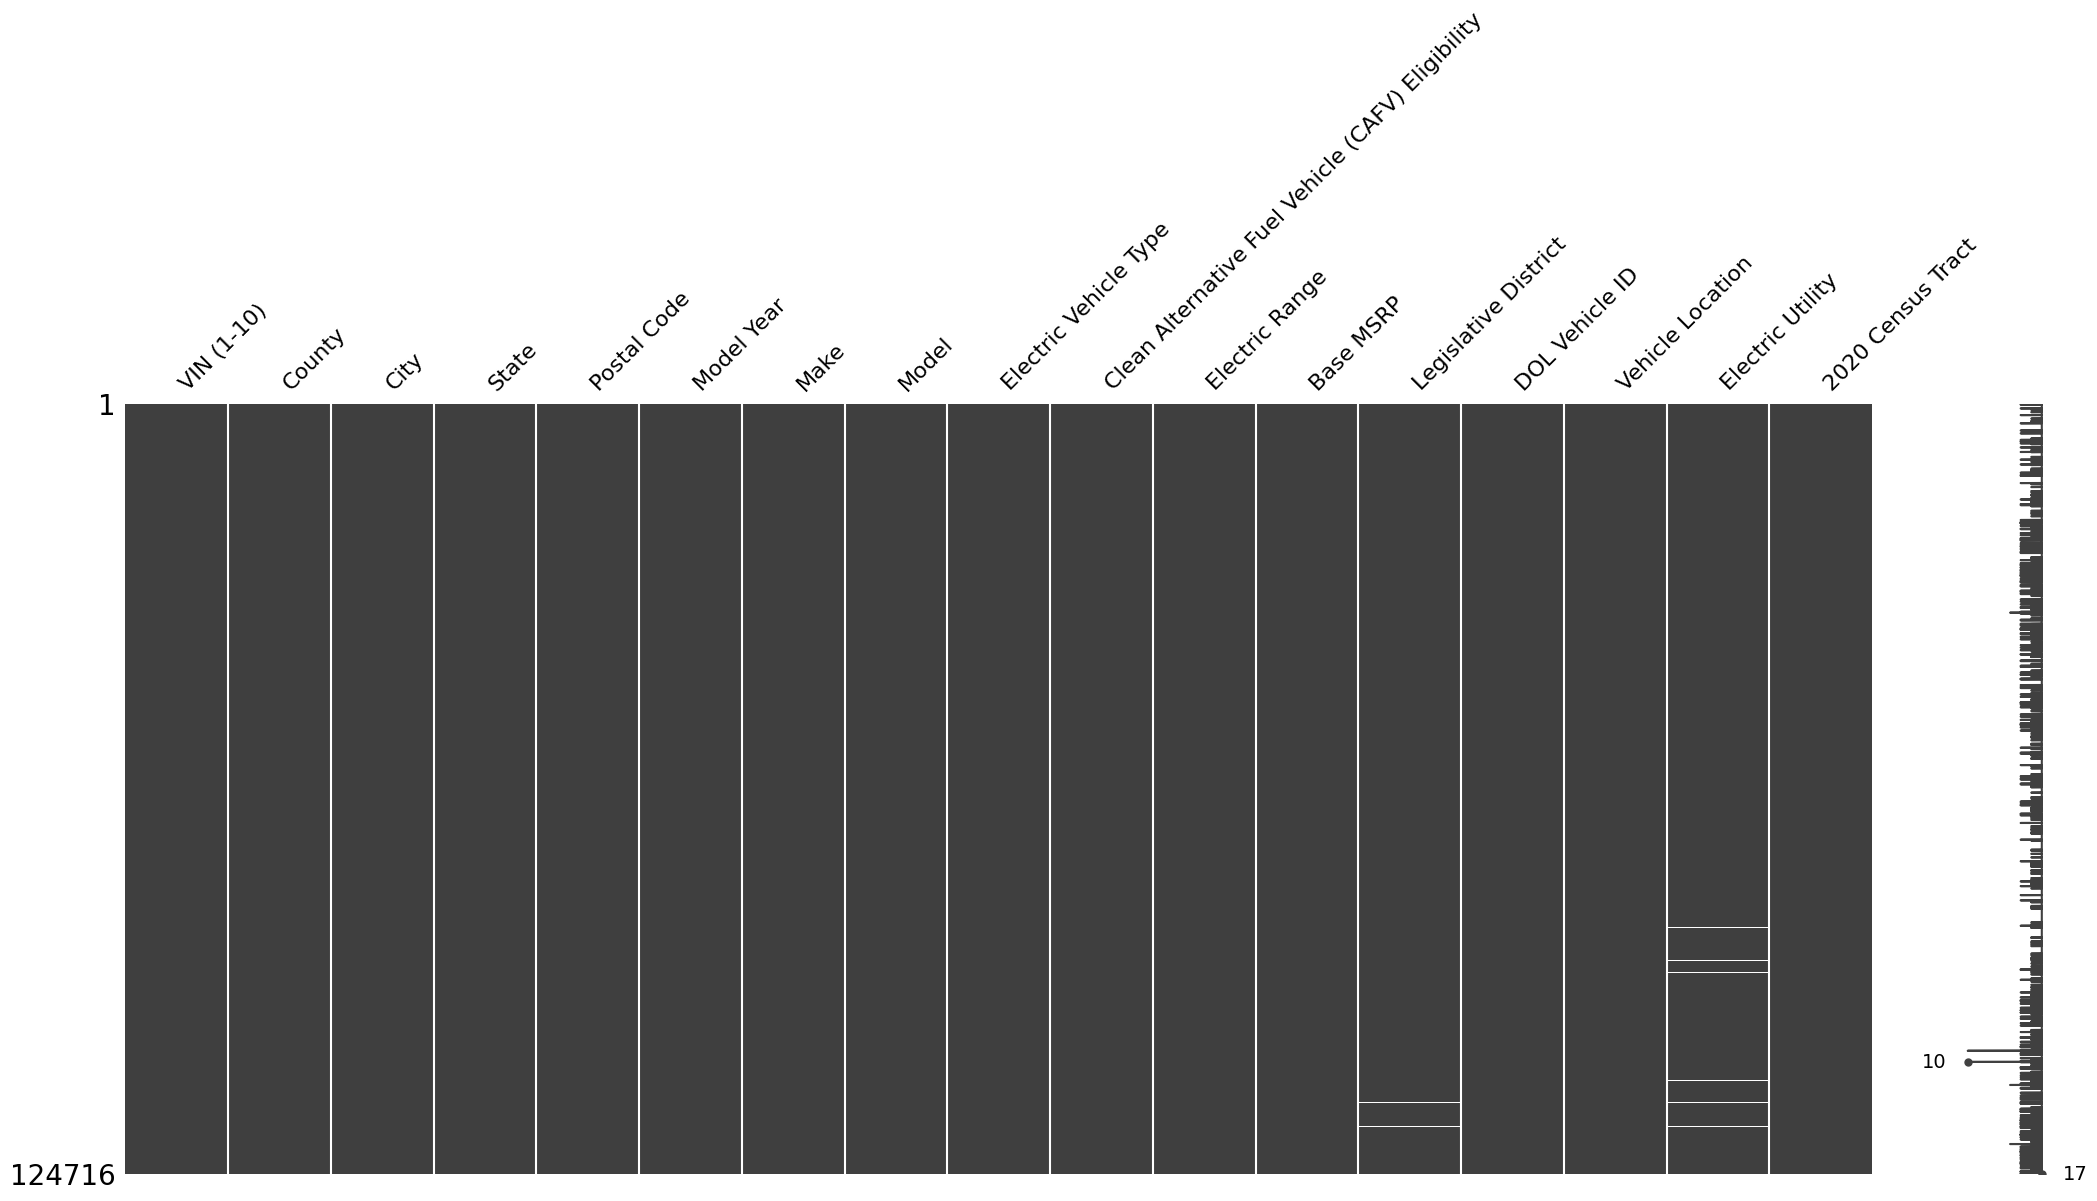

In [8]:
msno.matrix(df);

This missingness matrix offers a clear visual breakdown of our dataset's completeness.
The dark areas signify present data, while white gaps pinpoint missing entries.

Observations:
- The dataset generally seems quite complete, though a few columns do stand out with noticeable missingness.
- Observed missing values concentrated in the following columns:
    * `Electric Utility`: This column has the highest number of missing values.
    * `Legislative District`: This column also shows many missing entries.
    * `Vehicle Location`, `County`, `City`, `Postal Code`, and `2020 Census Tract`: Each of these columns has a relatively small number of missing values 


In [9]:
# Dropping the missing values
df = df.dropna()

Creating new columns for better analysis of data

In [10]:
import datetime as dt
current_year = dt.datetime.now().year
df['Car_Age'] = current_year - df['Model Year']

In [11]:
df['Is_Recent_Model'] = df['Model Year'] >= 2018
df['Is_Recent_Model'] = df['Is_Recent_Model'].astype(int)

In [12]:
top_states = df['State'].value_counts().head(5).index.tolist()
df['High_EV_State'] = df['State'].isin(top_states).astype(int)

In [13]:
# yes = 1, no = 0
df['Is_CAFV_Eligible'] = (df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible').astype(int)

In [14]:
county_counts = df['County'].value_counts()
df['EVs_in_County'] = df['County'].map(county_counts)

In [15]:
# Extracting latitude and longitude
def extract_lat_lon(text):
    numbers = re.findall(r'-?\d+\.\d+', str(text))  # finding all decimal numbers using regex
    if len(numbers) >= 2:
        lon = float(numbers[0])  # Longitude comes first in the string
        lat = float(numbers[1])
        return pd.Series([lat, lon])
    else:
        return pd.Series([None, None])

df[['Latitude', 'Longitude']] = df['Vehicle Location'].apply(extract_lat_lon)

df = df.dropna(subset=['Latitude', 'Longitude'])

In [16]:
# combined location field
df['Full_Location'] = df[['County', 'City', 'State']].astype(str).agg(', '.join, axis=1)

In [17]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')

In [18]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

In [19]:
df.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Car_Age,Is_Recent_Model,High_EV_State,Is_CAFV_Eligible,EVs_in_County,Latitude,Longitude,Full_Location,Price_Range_Category,Electric_Range_Category
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,5,1,1,1,687,46.58514,-120.56916,"Yakima, Yakima, WA",Unknown,Long
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10,6,1,1,1,687,46.58514,-120.56916,"Yakima, Yakima, WA",Unknown,Medium
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10,8,0,1,0,14017,47.80310,-122.18384,"Snohomish, Bothell, WA",Unknown,Short
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10,10,0,1,1,14017,47.97659,-122.20596,"Snohomish, Everett, WA",Unknown,Short
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10,7,1,1,1,4125,47.73689,-122.64681,"Kitsap, Poulsbo, WA",Unknown,Medium
7,WDC0G5EB0K,Yakima,Naches,WA,98937.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,14.0,338148968,POINT (-120.69972 46.7309),PACIFICORP,5.307700e+10,6,1,1,0,687,46.73090,-120.69972,"Yakima, Naches, WA",Unknown,Short
8,1N4AZ0CP3D,Kitsap,Port Orchard,WA,98366.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26.0,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,12,0,1,1,4125,47.54103,-122.63847,"Kitsap, Port Orchard, WA",Unknown,Short
9,KNDCC3LD9K,Kitsap,Olalla,WA,98359.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,6,1,1,0,4125,47.42602,-122.54729,"Kitsap, Olalla, WA",Unknown,Short
10,KNDJX3AE8G,Snohomish,Bothell,WA,98012.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,21.0,442691672,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10,9,0,1,1,14017,47.83448,-122.21061,"Snohomish, Bothell, WA",Low,Short
11,KNDC3DLCXN,Thurston,Olympia,WA,98502.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,202289321,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,3,1,1,0,4517,47.03779,-122.92333,"Thurston, Olympia, WA",Unknown,Unknown


In [ ]:
def plot_column_counts(data, column_name, top_n=None):
    counts = data[column_name].value_counts()

    # To create top N categories
    if top_n is not None:
        counts = counts.head(top_n)

    # Creating a color palette for categories
    colors = sns.color_palette("pastel", len(counts))

    # 2 plots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    ax1.set_title(f"{column_name} - Pie Chart")

    sns.barplot(x=counts.index, y=counts.values, ax=ax2, palette=colors)
    ax2.set_title(f"{column_name} - Bar Chart")
    ax2.set_xlabel(column_name)
    ax2.set_ylabel("Count")
    ax2.tick_params(axis='x', rotation=30)

    # Labels
    for i, count in enumerate(counts.values):
        ax2.text(i, count + 0.5, str(count), ha='center')

    plt.tight_layout()
    plt.show()


In [21]:
def plot_ev_locations(df, group_by='Full_Location', top_n=10, figsize=(10, 6)):
    top_groups = df[group_by].value_counts().head(top_n).index
    subset = df[df[group_by].isin(top_groups)]

    # lowercase 'latitude' and 'longitude'
    plt.figure(figsize=figsize)
    sns.scatterplot(data=subset,
                    x='longitude',
                    y='latitude',
                    hue=group_by,
                    palette='Set2',
                    s=50)

    plt.title(f'EV Locations (Top {top_n} by {group_by})')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title=group_by, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [22]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract', 'Car_Age',
       'Is_Recent_Model', 'High_EV_State', 'Is_CAFV_Eligible', 'EVs_in_County',
       'Latitude', 'Longitude', 'Full_Location', 'Price_Range_Category',
       'Electric_Range_Category'],
      dtype='object')


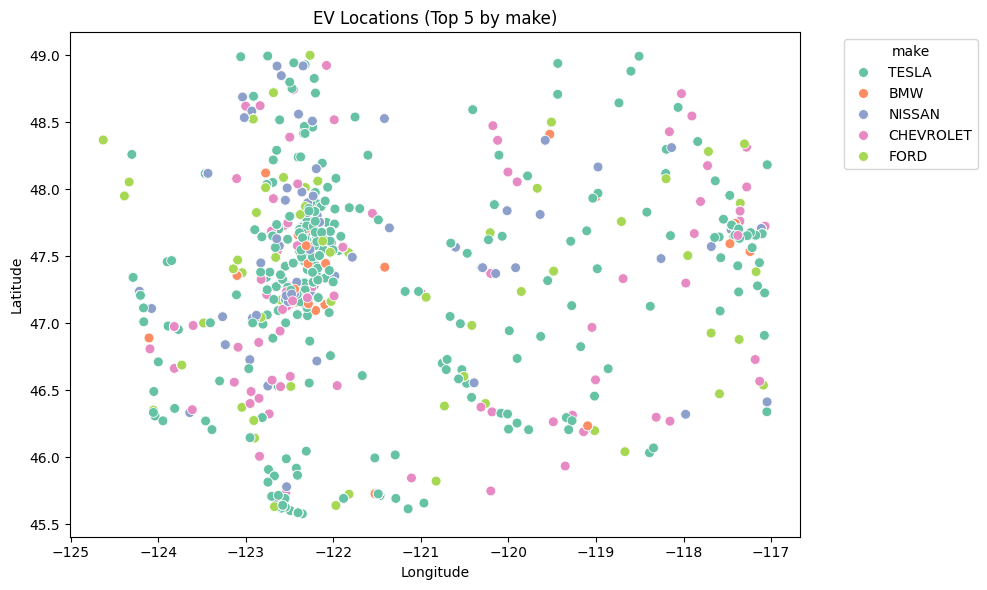

In [46]:
df.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
plot_ev_locations(df, group_by='make', top_n=5)

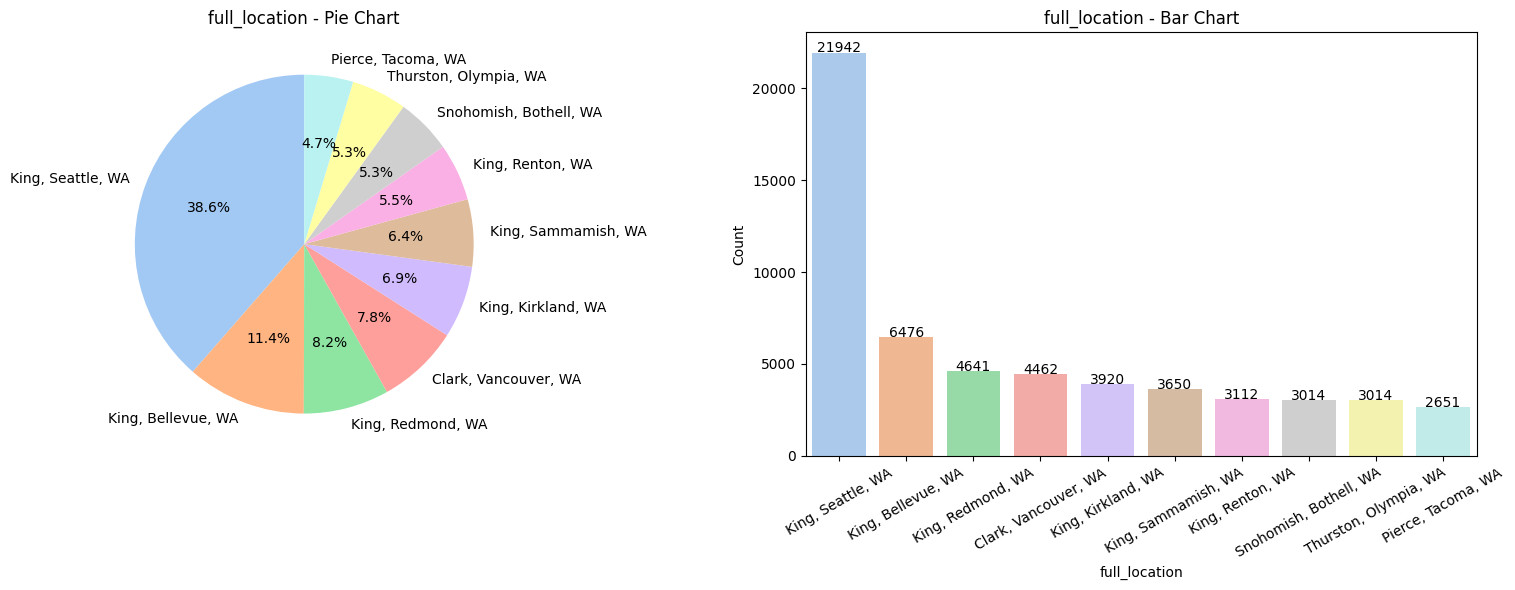

In [48]:
plot_column_counts(df, 'full_location', top_n=10)

The county of King, Seattle has substantially more EVs than other counties in WA

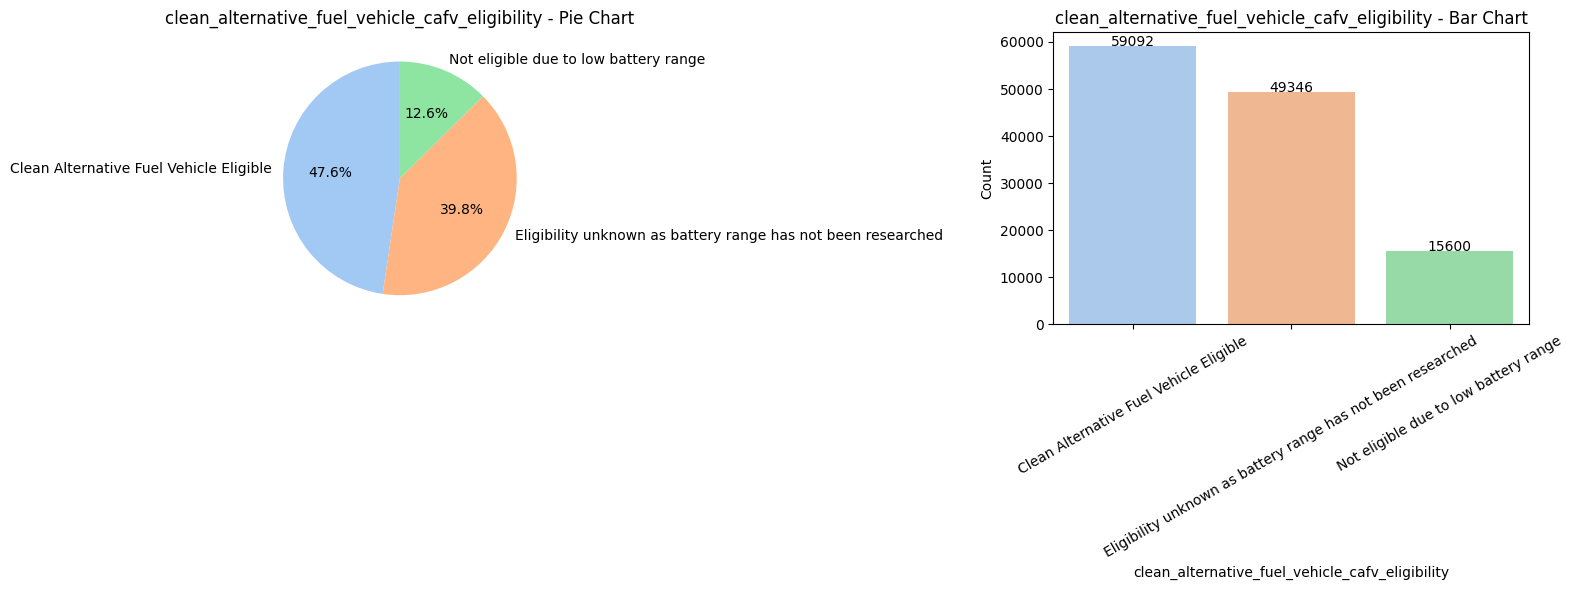

In [54]:
plot_column_counts(df, 'clean_alternative_fuel_vehicle_cafv_eligibility', top_n=3)

This visualization clearly shows that atleast 47.6% of the total EVs are CAFV eligible (not a very reliable figure because aligibility of 39.8% of the vechiles is unknown in the dataset as battery range has not been researched)

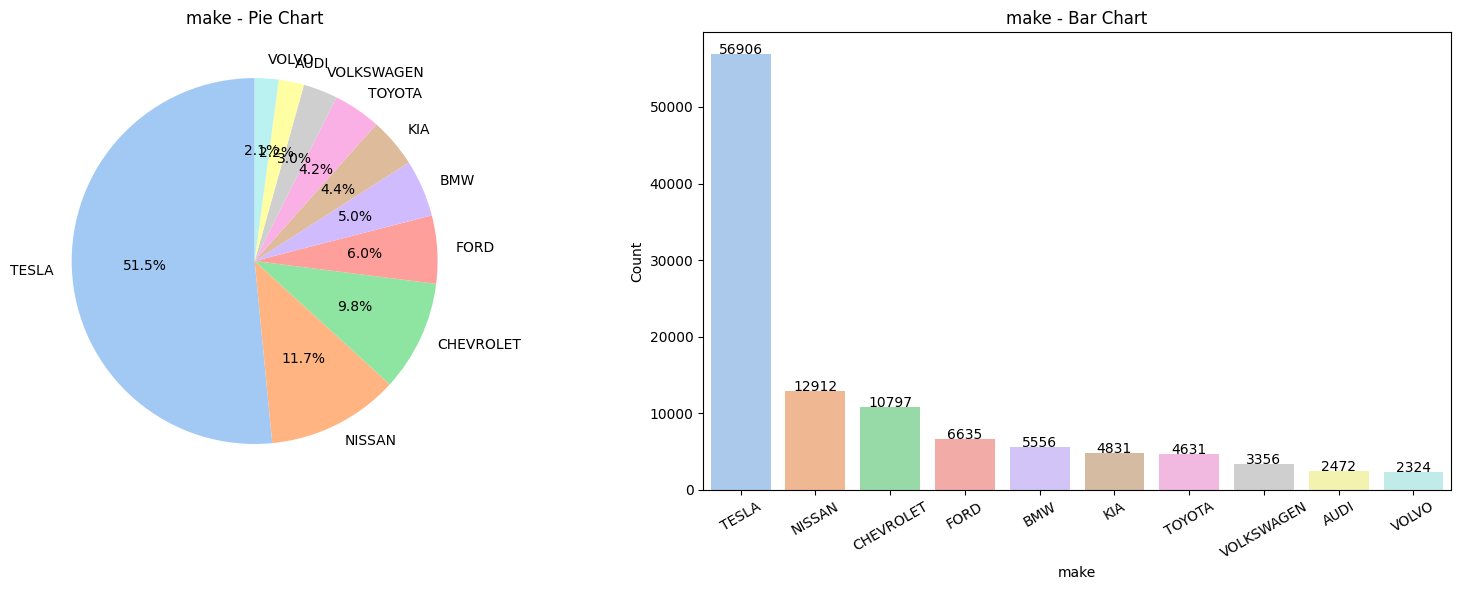

In [52]:
plot_column_counts(df, 'make', top_n=10)

Tesla has more than half of the market share currently, followed by Nissan and Chevrolet

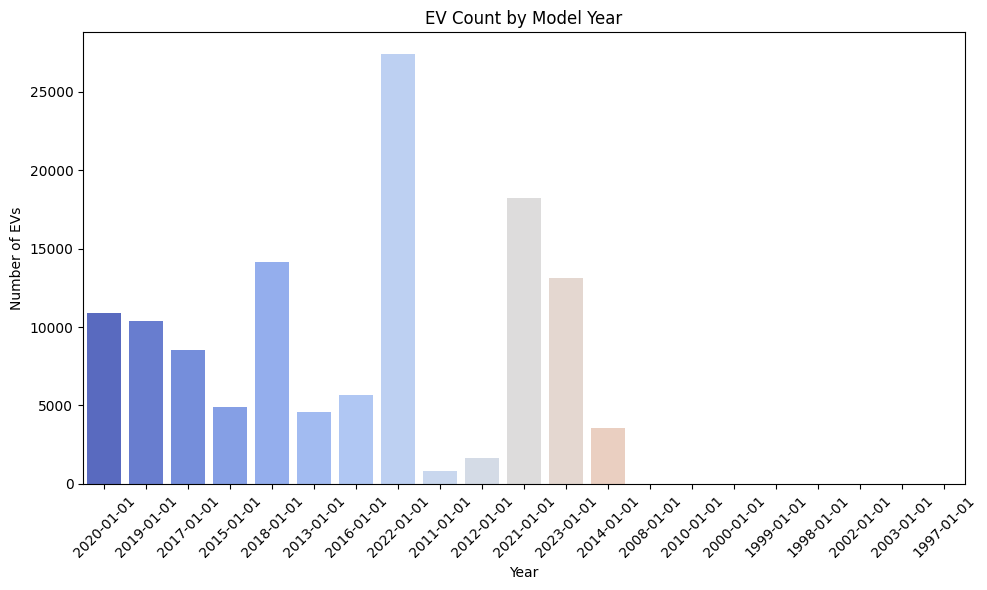

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='model_year', palette='coolwarm')
plt.title('EV Count by Model Year')
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most of the vechiles owned in WA are 2022 model (state fav)

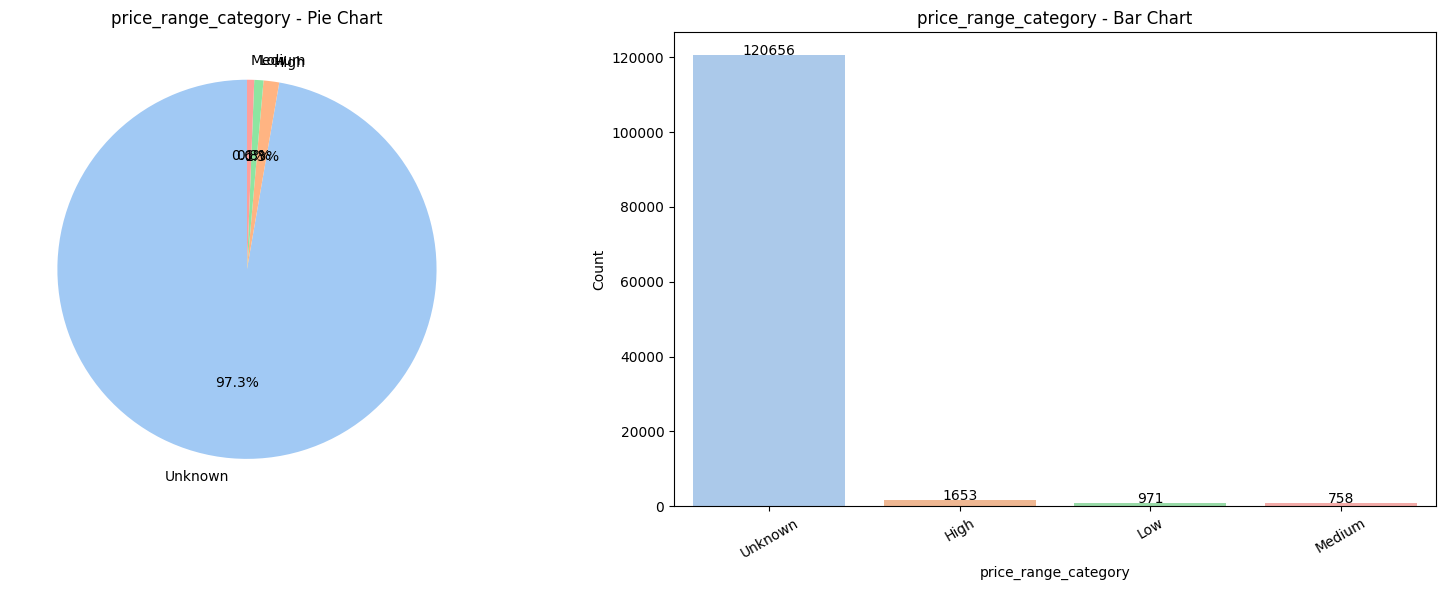

In [50]:
plot_column_counts(df, 'price_range_category')

Since most of the brands don't specify the base MSRP, so we have a lot of unknowns, hence WE DISCARD THIS column/metric and will not use anywhere further.

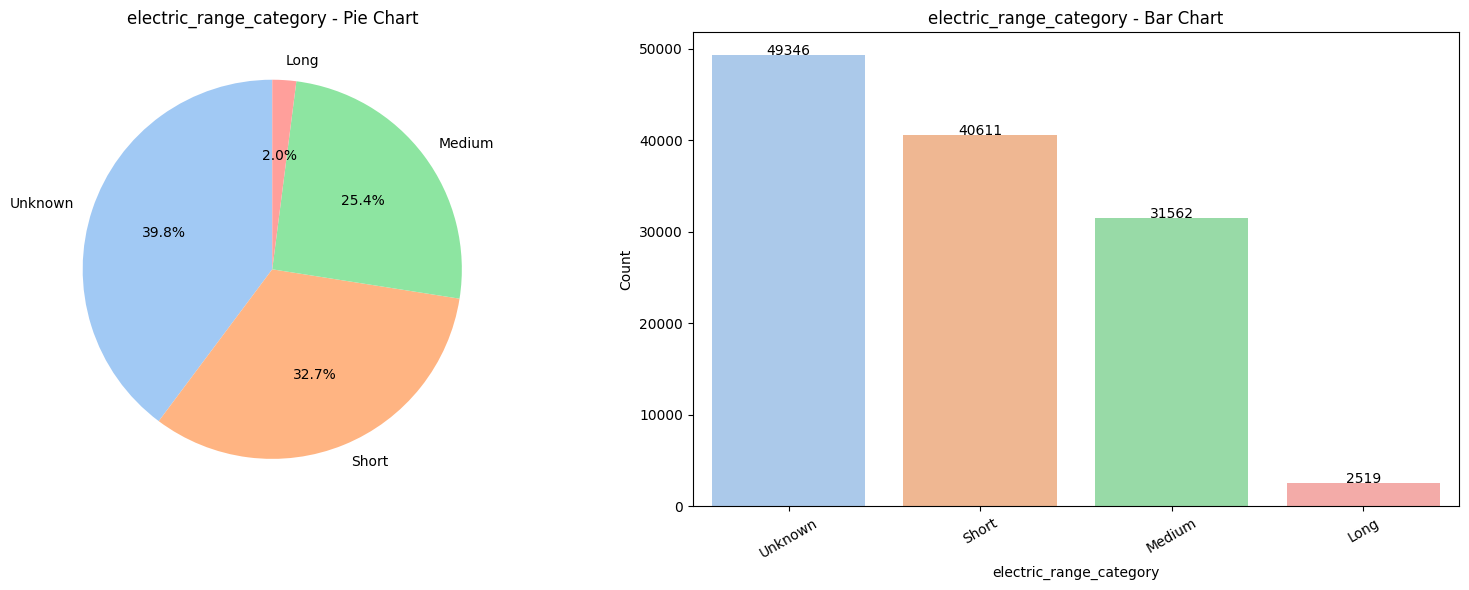

In [55]:
plot_column_counts(df, 'electric_range_category')

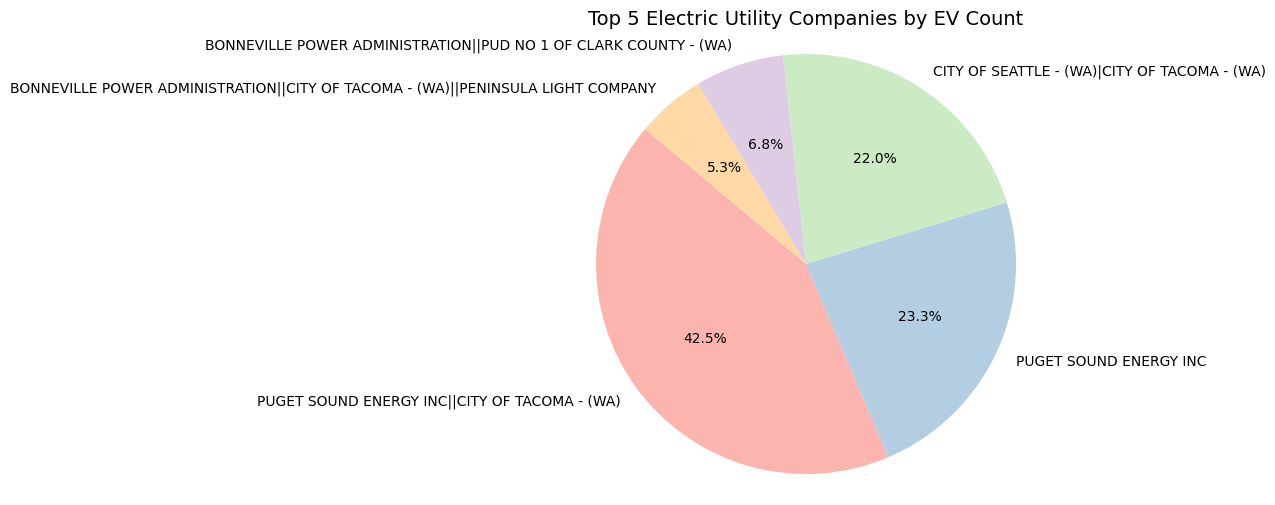

In [62]:
top_utilities = df['electric_utility'].value_counts().head(5)

plt.figure(figsize=(8, 6))
plt.pie(top_utilities.values,
        labels=top_utilities.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)

plt.title('Top 5 Electric Utility Companies by EV Count', fontsize=14)
plt.axis('equal')
plt.show()

Puget Sound Energy INC || City Of Tacoma is the electric utility company with majority of the market share

In [57]:
print(df.columns.tolist())

['vin_1-10', 'county', 'city', 'state', 'postal_code', 'model_year', 'make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_cafv_eligibility', 'electric_range', 'base_msrp', 'legislative_district', 'dol_vehicle_id', 'vehicle_location', 'electric_utility', '2020_census_tract', 'car_age', 'is_recent_model', 'high_ev_state', 'is_cafv_eligible', 'evs_in_county', 'latitude', 'longitude', 'full_location', 'price_range_category', 'electric_range_category']


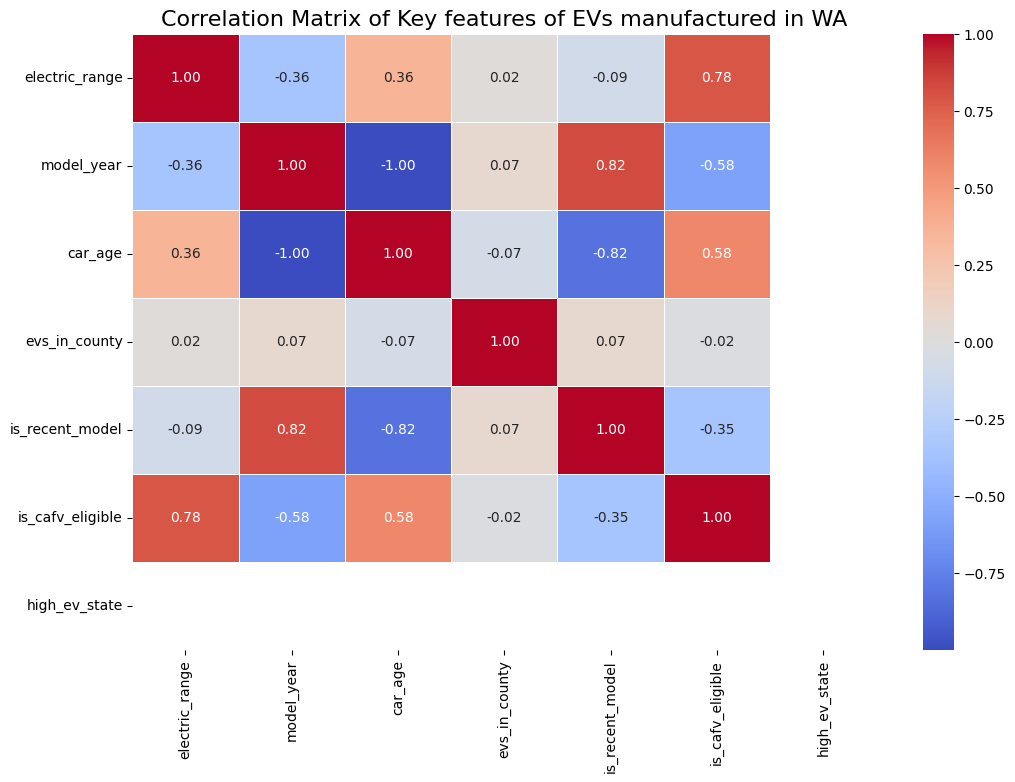

In [59]:
imp_features = [
    'electric_range',
    'model_year',
    'car_age',
    'evs_in_county',
    'is_recent_model',
    'is_cafv_eligible',
    'high_ev_state',
]

plt.figure(figsize=(12, 8))
correlation_matrix = df[imp_features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key features of EVs manufactured in WA', fontsize=16)
plt.show()


Correlation between :
Range and CAFV elegibility = 0.78 : suggests a strong correlation, so EVs eligible for clean fuel incentives tend to have longer electric ranges. Hence, better performance.
Range and car age = 0.36 : slightly positive; interesting, as it suggests  newere cars may not always have longer range (non linear relationship)

Going forward, dropping the model year as it is a redundant feature due to car age (highly correlated)
Also dropping high_ev_state column as entire dataset is from WA

**BUILDING THE MODEL**

In [60]:
features = [
    'electric_range',
    'model_year',
    'car_age',
    'evs_in_county',
    'is_recent_model',
    'is_cafv_eligible',
    'high_ev_state',
]

df_ml = df.dropna(subset=features + ['make'])

x = df_ml[features]
y = df_ml['make']

In [76]:
# Removing datetime columns bcs rf can't handle them
x_cleaned = x.select_dtypes(exclude=['datetime', 'datetime64[ns]'])

# encoding target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

rf = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(rf, x_cleaned, y_encoded, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-validation scores: [0.83440826 0.83154628 0.83505321 0.83125731 0.83093482]
Average CV Accuracy: 83.26%


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [82]:
x_cleaned = x.select_dtypes(exclude=['datetime64[ns]', 'datetime'])
# Feature Scaling
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)
x_scaled = scalar.fit_transform(x_cleaned)

Training a Random Forest Classifier.
Random Forest Classifier is chosen because:
 1) Dataset contains a combination of continuous numerical variables (electric_range, car_age, evs_in_county) and also contains binary flags   (is_recent_model, is_cafv_eligible).
 Random Forests can handle that mix without requiring preprocessing using scaling or other methods making the pipeline simpler.
 
 2) Data we contain is non linear (vechile brand choice is rarely linear):
      Ex: a car with higher Range and being CAFV eligible might more likely be a Tesla, this depicts a non linear kind of relationship, which Random Forest Classifier effectively deals with.

In [84]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [85]:
print("y_test type:", y_test.dtype)
print("y_pred type:", y_pred.dtype)

print("y_test sample:", y_test[:5])
print("y_pred sample:", y_pred[:5])

y_test type: int64
y_pred type: float64
y_test sample: [ 9  3 29  9 29]
y_pred sample: [632.10109908 444.0001044  257.60046672]


In [86]:
y_pred = rf.predict(x_test_scaled)

In [87]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

Accuracy: 0.5351096420509514

Classification Report:
                       precision    recall  f1-score   support

                AUDI       0.98      0.52      0.68       494
      AZURE DYNAMICS       0.25      1.00      0.40         1
             BENTLEY       0.00      0.00      0.00         1
                 BMW       0.94      0.69      0.80      1111
            CADILLAC       0.36      0.95      0.52        22
           CHEVROLET       0.99      0.76      0.86      2159
            CHRYSLER       0.93      0.82      0.87       379
                FIAT       0.82      0.54      0.65       162
              FISKER       0.05      1.00      0.09         3
                FORD       0.85      0.51      0.64      1327
             GENESIS       0.00      0.00      0.00         9
               HONDA       0.62      1.00      0.77       159
             HYUNDAI       0.64      0.29      0.40       399
              JAGUAR       0.28      0.86      0.43        44
               

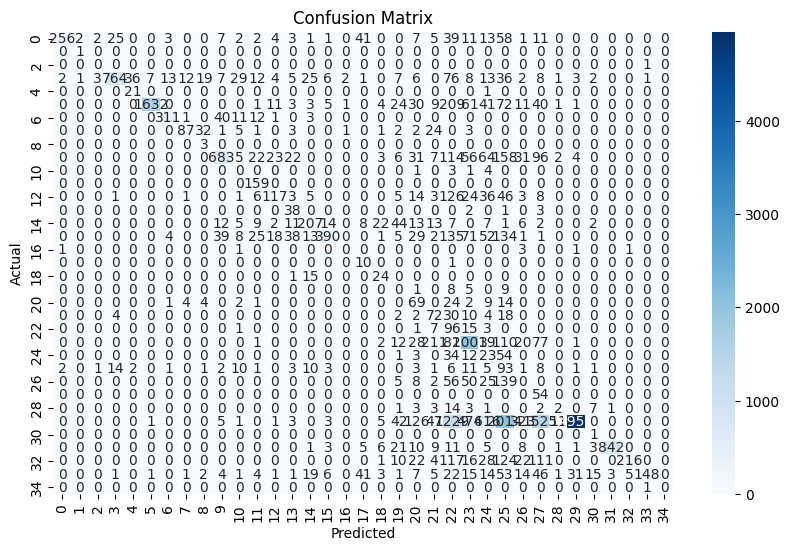

In [88]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

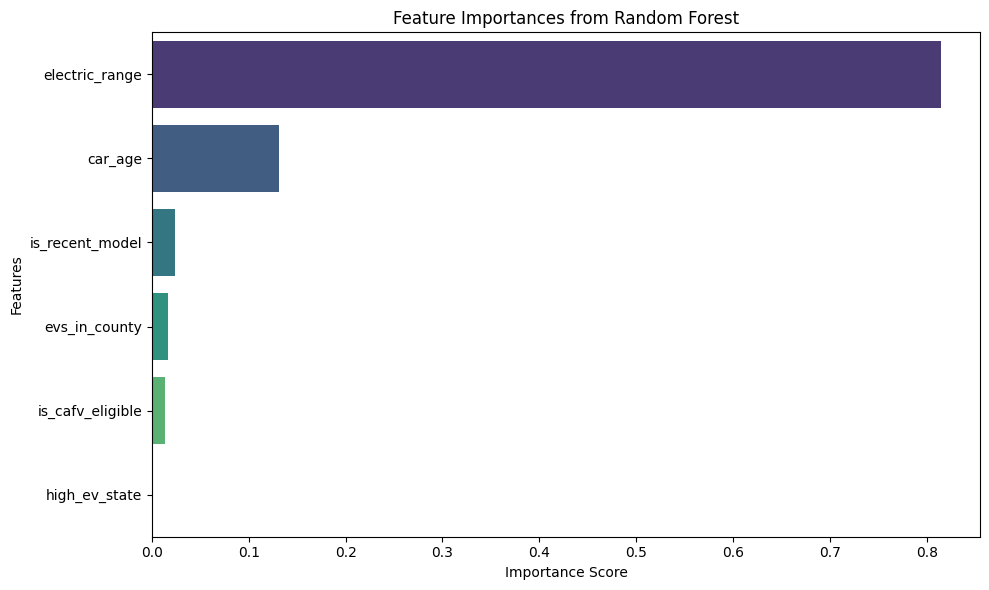

In [92]:
importances = rf.feature_importances_
feature_names = x_cleaned.columns

feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

The above chart shows which features the Random Forest model relied on most while making predictions. `Electric Range` and `Model Year` appear at the top, hence these factors are key influencers in determining the EV brand/type.

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

x = df[[
    'electric_range', 'model_year', 'car_age',
    'evs_in_county', 'is_recent_model',
    'is_cafv_eligible', 'high_ev_state'
]]
y = df['make']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Handling missing values in x
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x_cleaned)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_imputed)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_scaled, y_train)

cv_scores = cross_val_score(rf, x_scaled, y_encoded, cv=skf, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-validation scores: [0.8316672  0.83384392 0.83428733 0.83113637 0.83319224]
Average CV Accuracy: 83.28%


Model was validated using 5-fold cross-validation. The average accuracy of 83.25% confirms that the model generalizes well and is not overfitting to training data

In [96]:
#Saving the model
import joblib

joblib.dump(rf, 'random_forest_ev_classifier.pkl')

['random_forest_ev_classifier.pkl']

In [102]:
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Now trying the model on unique sample data

In [104]:
sample_input = [[120, 2022, 1, 2500, 1, 1 ]]  # Example input: Electric Range, Model Year, Car Age, EVs in County, Is Recent Model, Is CAFV Eligible

sample_input_scaled = scaler.transform(sample_input)

predicted_class = rf.predict(sample_input_scaled)
predicted_label = le.inverse_transform(predicted_class)

print("Predicted EV Make for sample input:", predicted_label[0])

Predicted EV Make for sample input: TOYOTA


Our Random Forest Classification model successfully predicts Toyota as the Car brand for various sample input variables.

**HyperParameter Training for improved model performance**

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Fit on training data
grid_search.fit(x_train_scaled, y_train)

best_rf = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score: {:.2f}%".format(grid_search.best_score_ * 100))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 83.29%


Here we applied GridSearchCV technique to tune hyperparameters of our Random Forest Classifier. The best configuration improved performance over the default model and created a better balance between underfitting and overfitting.

Test Accuracy after tuning: 0.8307803934214769

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.59      0.71       494
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.92      0.83      0.87      1111
           4       1.00      0.91      0.95        22
           5       0.99      0.77      0.86      2159
           6       0.88      0.96      0.92       379
           7       0.89      0.78      0.84       162
           8       1.00      1.00      1.00         3
           9       0.98      0.54      0.69      1327
          10       0.00      0.00      0.00         9
          11       1.00      0.99      1.00       159
          12       0.98      0.30      0.45       399
          13       1.00      0.86      0.93        44
          14       0.78      0.93      0.85       385
          15       0.88      0.49      0.63       966
         

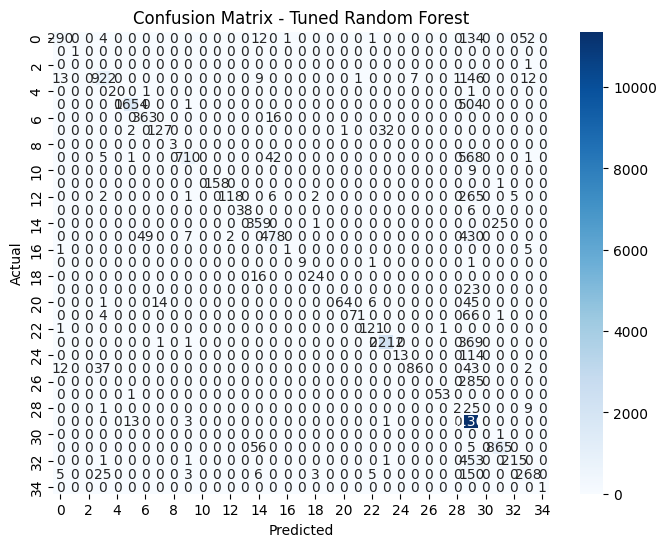

In [106]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict using the best model
y_pred_best = best_rf.predict(x_test_scaled)

print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

We can observe that after hyperparameter tuning, the accuracy has gone up from 54% to a whopping 83%

In [107]:
import joblib

joblib.dump(best_rf, "random_forest_ev_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model, Scaler, and Encoder saved successfully.")

Model, Scaler, and Encoder saved successfully.


Testing our new final model

In [109]:
rf_model = joblib.load("random_forest_ev_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")
loaded_encoder = joblib.load("label_encoder.pkl")

# Example user input : Format - ['electric_range', 'model_year', 'car_age', 'evs_in_county', 'is_recent_model', 'is_cafv_eligible']
sample_input = [[250, 2023, 1, 4500, 1, 1]]

sample_scaled = loaded_scaler.transform(sample_input)

predicted_brand = rf_model.predict(sample_scaled)
predicted_brand_label = loaded_encoder.inverse_transform(predicted_brand)

print("Predicted EV Brand:", predicted_brand_label[0])

Predicted EV Brand: TESLA


**Using Linear Regression to plot sales growth in the state by top 5 EV companies**

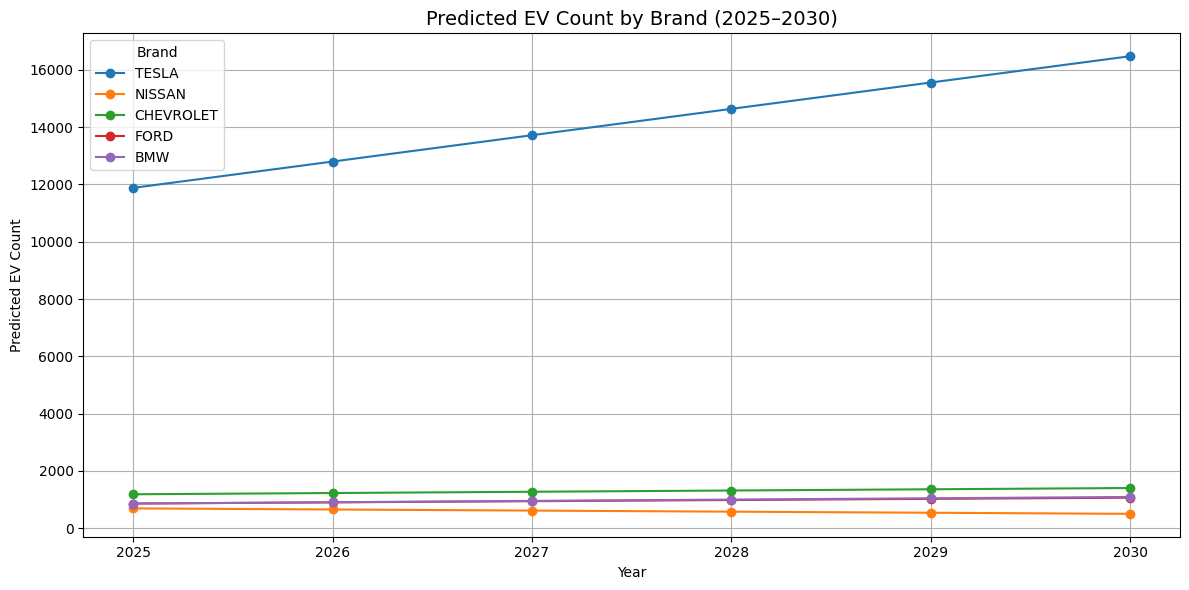

In [116]:
df['model_year_int'] = df['model_year'].dt.year
brand_year_data = df[df['model_year_int'] >= 2010].groupby(['model_year_int', 'make']).size().reset_index(name='count')

top_brands = brand_year_data.groupby('make')['count'].sum().sort_values(ascending=False).head(5).index.tolist()
brand_year_data = brand_year_data[brand_year_data['make'].isin(top_brands)]

future_years = np.arange(2025, 2031)
future_predictions = []

for brand in top_brands:
    brand_data = brand_year_data[brand_year_data['make'] == brand]
    X = brand_data['model_year_int'].values.reshape(-1, 1)
    y = brand_data['count'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(future_years.reshape(-1, 1)).clip(min=0)  # to avoid negatives
    for year, pred in zip(future_years, y_pred.astype(int)):
        future_predictions.append({'model_year_int': year, 'make': brand, 'predicted_count': pred})

future_df = pd.DataFrame(future_predictions)

plt.figure(figsize=(12, 6))
for brand in top_brands:
    data = future_df[future_df['make'] == brand]
    plt.plot(data['model_year_int'], data['predicted_count'], marker='o', label=brand)

plt.title("Predicted EV Count by Brand (2025–2030)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Predicted EV Count")
plt.legend(title="Brand")
plt.grid(True)
plt.tight_layout()
plt.show()

This does not appear to be very accurate. Hence, **Discarding it.**

Let's check the model's accuracy

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

for brand in top_brands:
    brand_data = brand_year_data[brand_year_data['make'] == brand]
    X = brand_data['model_year_int'].values.reshape(-1, 1)
    y = brand_data['count'].values

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred_train = model.predict(X)
    
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)
    
    print(f"Brand: {brand}")
    print(f" - R² Score: {r2:.2f}")
    print(f" - Mean Squared Error: {mse:.2f}")
    print("")

Brand: TESLA
 - R² Score: 0.72
 - Mean Squared Error: 5442101.81

Brand: NISSAN
 - R² Score: 0.09
 - Mean Squared Error: 199635.98

Brand: CHEVROLET
 - R² Score: 0.07
 - Mean Squared Error: 365877.57

Brand: FORD
 - R² Score: 0.10
 - Mean Squared Error: 181871.94

Brand: BMW
 - R² Score: 0.27
 - Mean Squared Error: 47002.74



R² > 0.85 is generally considered pretty safe and accurate but here we can see for most of the brands it is not even close, so we improve the model using a time series model : **Facebook Prophet** 

In [29]:
pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 1.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]m4/5 [prophet]]
Note: you may need to restart the kernel to use updated packages.


20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing
20:06:22 - cmdstanpy - INFO - Chain [1] start processing
20:06:22 - cmdstanpy - INFO - Chain [1] done processing


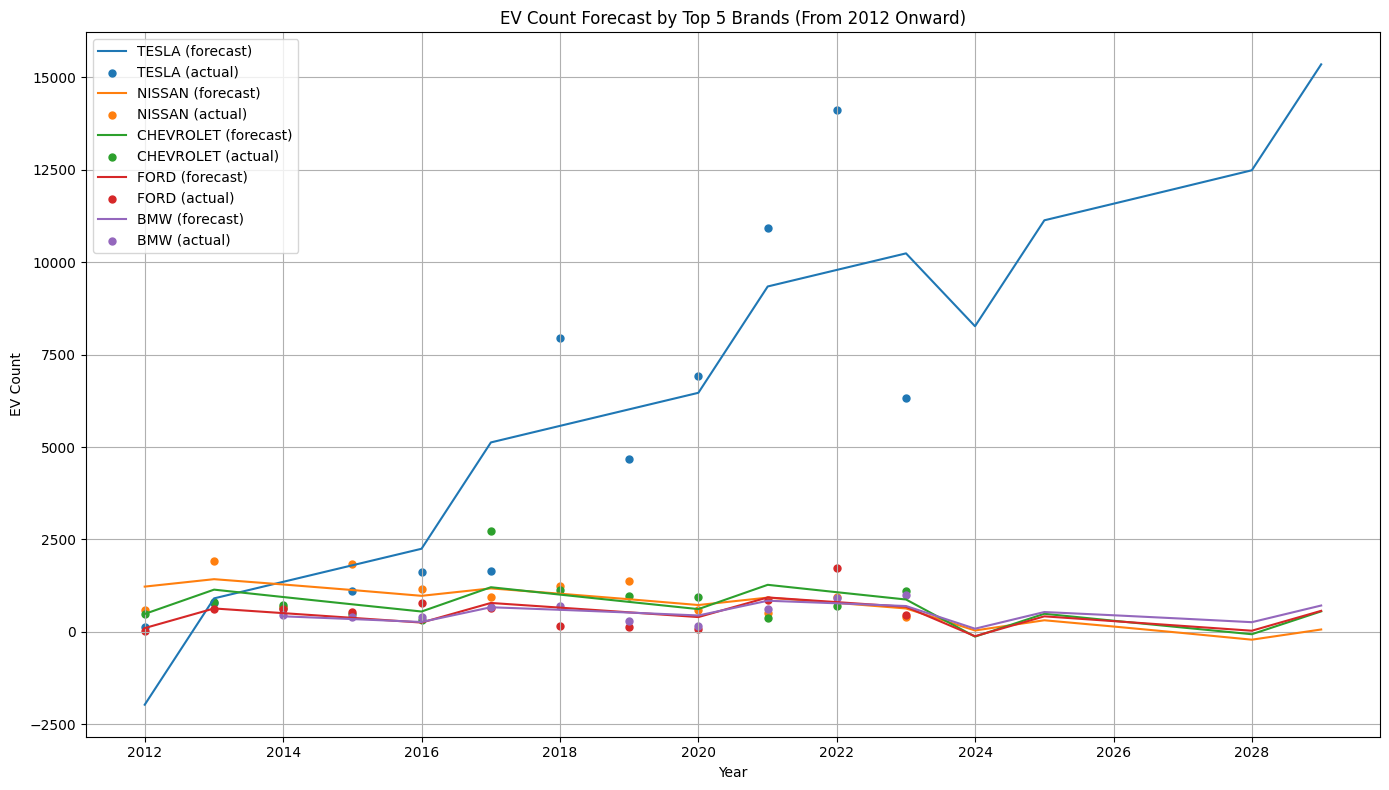

In [119]:
from prophet import Prophet

df = pd.read_csv("ev_eda_cleaned_for_tableau.csv")

# Ensuring datetime format for 'Model Year'
df['model_year'] = pd.to_datetime(df['model_year'], format='%Y', errors='coerce')
df = df.dropna(subset=['model_year', 'make'])

top_brands = df['make'].value_counts().head(5).index.tolist()

plt.figure(figsize=(14, 8))

for brand in top_brands:
    brand_data = df[df['make'] == brand]
    
    yearly = brand_data.groupby(brand_data['model_year'].dt.year).size().reset_index(name='ev_count')
    yearly.columns = ['ds', 'y']
    yearly['ds'] = pd.to_datetime(yearly['ds'], format='%Y')
    yearly = yearly[yearly['ds'].dt.year >= 2012]

    m = Prophet(yearly_seasonality=True)
    m.fit(yearly)
    future = m.make_future_dataframe(periods=6, freq='Y')
    forecast = m.predict(future)
    forecast = forecast[forecast['ds'].dt.year >= 2012]

    plt.plot(forecast['ds'], forecast['yhat'], label=f'{brand} (forecast)')
    plt.scatter(yearly['ds'], yearly['y'], label=f'{brand} (actual)', s=25)

yearly['floor'] = 0

future['floor'] = 0

forecast = m.predict(future)

plt.title("EV Count Forecast by Top 5 Brands (From 2012 Onward)")
plt.xlabel("Year")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


  Tesla is expected to continue its dominant trajectory with a sharp growth curve. The forecast suggests that Tesla will remain the market leader with a widening gap over other brands. This aligns with its strong momentum observed in historical data.

  Nissan, Chevrolet, Ford, and BMW show relatively flat or modest growth, indicating market saturation or lower model diversity in newer EVs. Their trend lines suggest stability but limited expansion in EV registrations unless major innovation or policy shifts occur.

  Interestingly, brands like Ford and Chevrolet seem to have potential for recovery post-2024, possibly due to new model releases or incentives.

  The overall market, while led by Tesla, indicates slow but steady diversification in brand representation — a healthy sign of maturing competition.

✅ Takeaway: Tesla is projected to dominate EV registrations in the near future, while other major brands exhibit stagnant or slow growth. This highlights the importance of innovation, infrastructure support, and consumer trust in shaping EV adoption trends.

